<a href="https://colab.research.google.com/github/Badal7Kashyap/Projects_Resume/blob/master/China_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-08-30 07:56:46 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


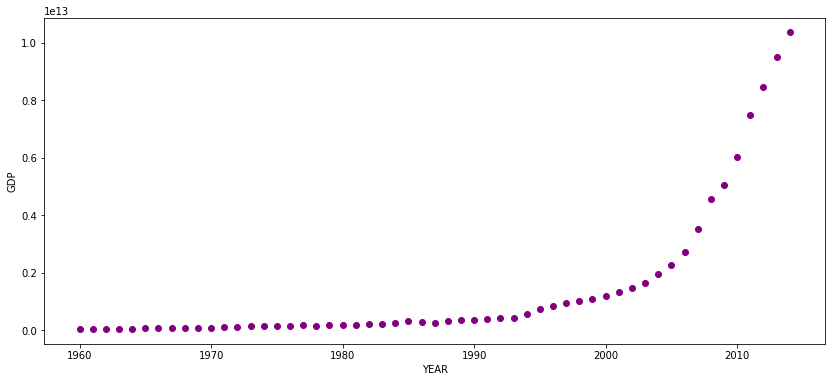

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Year'],df['Value'],marker='o',color='purple')
plt.xlabel("YEAR")
plt.ylabel("GDP")
plt.show()

Logistic Model Visualization

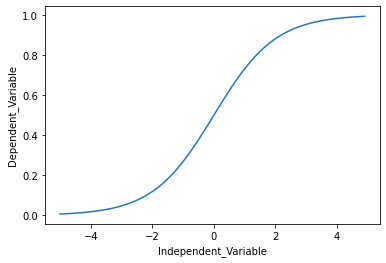

In [ ]:
X=np.arange(-5.0,5.0,0.1)
B_1=1.0
B_2=0.0
Y=1.0/(1.0+np.exp(-B_1*(X-B_2)))
plt.xlabel('Independent_Variable')
plt.ylabel('Dependent_Variable')
plt.plot(X,Y)
plt.show()

In [ ]:
x, y = (df["Year"].values, df["Value"].values)
m=np.size(x)

Sigmoid funtion: 1/(1+np.exp(-beta_1*(x-Beta_2)))

In [ ]:
def sigmoid(x,Beta_1,Beta_2):
    pred=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return pred

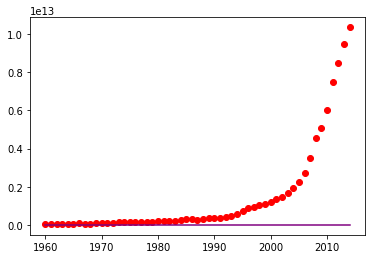

In [ ]:
Beta_1=0.03
Beta_2=199.0

prediction=sigmoid(x,Beta_1,Beta_2)
plt.plot(x,y,'ro')
plt.plot(x,prediction,color='purple')
plt.show()

Noramlization Of Data

In [ ]:
x=x/np.max(x)
#y=y/np.max(y)

In [ ]:
from scipy.optimize import curve_fit
x=x.reshape(m)
y=y.reshape(m) 
para,para_cov=curve_fit(sigmoid,x,y)
print("Paramenters \n")
print("Beta_1= %.3f, Beta_2= %.3f "%(para[0],para[1]))

Paramenters 

Beta_1= 690.453, Beta_2= 0.997 


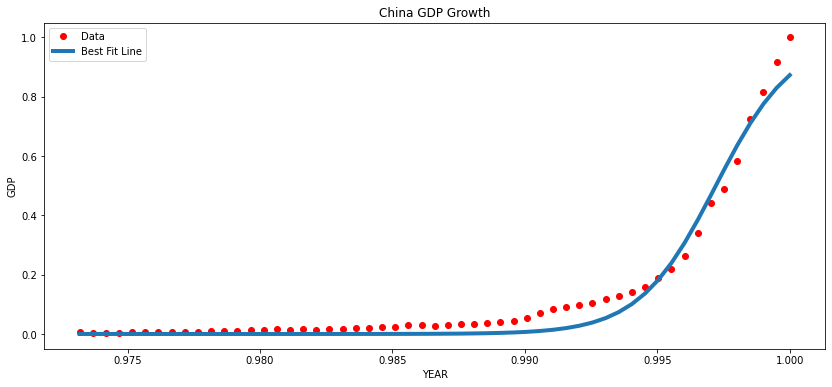

In [ ]:
modified_prediction=sigmoid(x,para[0],para[1])
plt.figure(figsize=(14,6))
plt.plot(x,y,'ro',label='Data')
plt.plot(x,modified_prediction,label='Best Fit Line',linewidth=4.0)
plt.xlabel('YEAR')
plt.ylabel('GDP')
plt.title('China GDP Growth')
plt.legend(loc='best')
plt.show()


Double-click __here__ for the solution.

<!-- Your answer is below:
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

-->

In [ ]:
msk = np.random.rand(len(x)) < 0.7
train_x = x[msk]
test_x = x[~msk]
train_y = y[msk]
test_y = y[~msk]

In [ ]:
model_parameters,model_conv=curve_fit(sigmoid,train_x,train_y)

model_parameters

array([608.87221521,   0.99710744])

In [ ]:
model_prediction=sigmoid(test_x,model_parameters[0],model_parameters[1])
model_prediction

array([4.73045195e-07, 8.65952691e-07, 1.17162838e-06, 2.40845446e-05,
       3.25859659e-05, 8.07044071e-05, 1.09189463e-04, 1.47726988e-04,
       3.65807545e-04, 4.94871489e-04, 1.22479304e-03, 7.46646872e-03,
       1.00755317e-02, 1.35838210e-02, 1.02572744e-01, 1.33930987e-01,
       1.73027617e-01, 2.76942199e-01, 3.41332793e-01, 4.12160622e-01,
       6.34580698e-01, 7.60706856e-01, 8.11361100e-01])

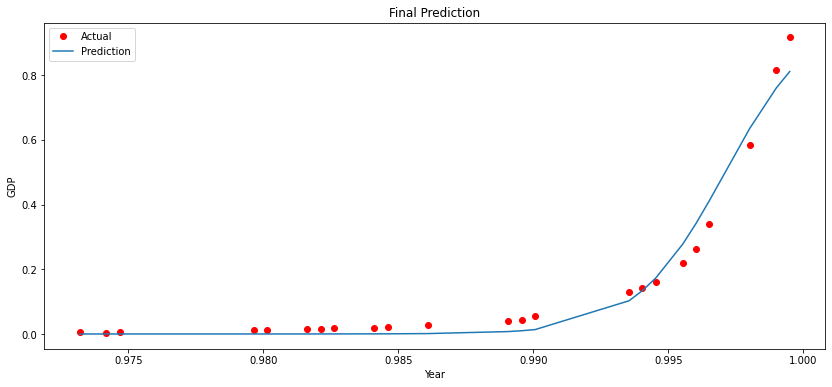

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(test_x,test_y,'ro',label='Actual')
plt.plot(test_x,model_prediction,label='Prediction')
plt.legend(loc='best')
plt.title('Final Prediction')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print("R2 Score: %.2f"%r2_score(model_prediction,test_y))
print("Mean Absolute Error: %.2f"%np.mean(np.absolute(model_prediction-test_y)))
print("Mean Square Error: %.2f"%np.mean(np.square(model_prediction-test_y)))

R2 Score: 0.97
Mean Absolute Error: 0.03
Mean Square Error: 0.00


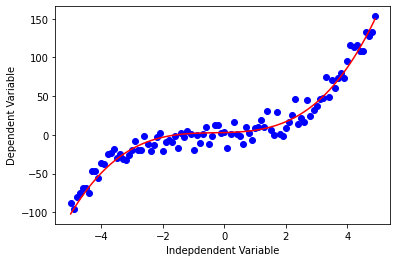

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 10 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()